# Initialization of the data set

### 1. Importing relevant libaries to perform cleaning and EDA steps.

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

### 2. Read data from a CSV (Comma-Separated Values) file and store it in a pandas DataFrame.

In [7]:
df = pd.read_csv('heart_disease.csv')

### 3. Display the first few rows of the DataFrame

In [8]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


### 4.  Display the dimensions of the DataFrame (Rows, Columns)

In [9]:
df.shape

(4238, 16)

### 5. Display the series with the data type of each column in the DataFrame.

In [10]:
df.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object

---
---
# DATA CLEANING STEPS


# DATA CLEANING STEP 1: RENAMING COLUMNS

In this section, we are renaming some columns in the dataset for better clarity and consistency. The original column names were not as descriptive or consistent, and we aim to make them more understandable.


## Original Column Names

1. Gender              
2. age                  
3. education           
4. currentSmoker        
5. cigsPerDay         
6. BPMeds             
7. prevalentStroke     
8. prevalentHyp         
9. diabetes             
10. totChol            
11. sysBP              
12. diaBP              
13. BMI                
14. heartRate          
15. glucose            
16. Heart_ stroke   

## Renamed Columns

After careful consideration, we have renamed the columns as follows:

1. Gender                          
2. Age                             
3. Education_Level                 
4. Is_Smoker                       
5. Cigarettes_Per_Day              
6. Systolic_BP                  
7. Diastolic_BP                 
8. Has_BP_Meds                     
9. Has_Prevalent_Hypertension     
10. Glucose                         
11. Has_Diabetes                    
12. BMI                            
13. Heart_Rate                      
14. Total_Cholestrol                
15. Has_Prevalent_Stroke            
16. Heart_Stroke    




In [11]:
# RENAMING FEATURES
df = df.rename(columns={"age": "Age",
                        "Heart_ stroke" : "Heart_Stroke",
                        "education": "Education_Level",
                        "currentSmoker":"Is_Smoker",
                        "cigsPerDay":"Cigarettes_Per_Day",
                        "BPMeds":"Has_BP_Meds",
                        "prevalentStroke":"Has_Prevalent_Stroke",
                        "prevalentHyp":"Has_Prevalent_Hypertension" ,
                        "diabetes":"Has_Diabetes",
                        "totChol":"Total_Cholestrol",
                        "sysBP":"Systolic_BP",
                        "diaBP":"Diastolic_BP",
                        "heartRate":"Heart_Rate",
                        "glucose":"Glucose"})

df.dtypes

Gender                         object
Age                             int64
Education_Level                object
Is_Smoker                       int64
Cigarettes_Per_Day            float64
Has_BP_Meds                   float64
Has_Prevalent_Stroke           object
Has_Prevalent_Hypertension      int64
Has_Diabetes                    int64
Total_Cholestrol              float64
Systolic_BP                   float64
Diastolic_BP                  float64
BMI                           float64
Heart_Rate                    float64
Glucose                       float64
Heart_Stroke                   object
dtype: object

In [12]:
category_counts = df['Has_Prevalent_Stroke'].value_counts()

# Calculate the percentage of each category
category_percentages = (category_counts / len(df)) * 100

print("Category Counts:")
print(category_counts)
print("\nCategory Percentages:")
print(category_percentages)

Category Counts:
Has_Prevalent_Stroke
no     4213
yes      25
Name: count, dtype: int64

Category Percentages:
Has_Prevalent_Stroke
no     99.410099
yes     0.589901
Name: count, dtype: float64


# DATA CLEANING STEP 2: REORDERING COLUMNS FOR BETTER READABILITY

In this section, we are rearranging the columns in the dataset to group relevant features together, improving the overall readability of the data.

We have rearrange certain columns that their information can be read better when they are next to each other. 
For example:
    Columns 'Systolic_BP','Diastolic_BP', 'Has_BP_Meds' are grouped together to understand the Blood Pressure information of a person with better readability
    Similarly, 'Glucose'  and 'Has_Diabetes', 'BMI' and  'BMI_Category', 'Heart_Rate', 'Total_Cholestrol' ,
                         'Has_Prevalent_Stroke' and 'Heart_Stroke are grouped together.

In [314]:
#2 Rearranging Columns of DataFrame 
df = df.reindex(columns=['Gender', 'Age', 'Education_Level' ,'Is_Smoker','Cigarettes_Per_Day','Systolic_BP',
                         'Diastolic_BP', 'Has_BP_Meds', 'Has_Prevalent_Hypertension'  , 'Glucose' ,
                         'Has_Diabetes' , 'BMI' , 'BMI_Category' , 'Heart_Rate', 'Total_Cholestrol' ,
                         'Has_Prevalent_Stroke' , 'Heart_Stroke' ])

---
# [EARLY STAGE EDA] __EDA 1__: OUTLIER DETECTION 


In this section, we will detect the outlier for all of our numeric value columns. It is important to detect them at the early stage because they may significantly impact our analysis. 

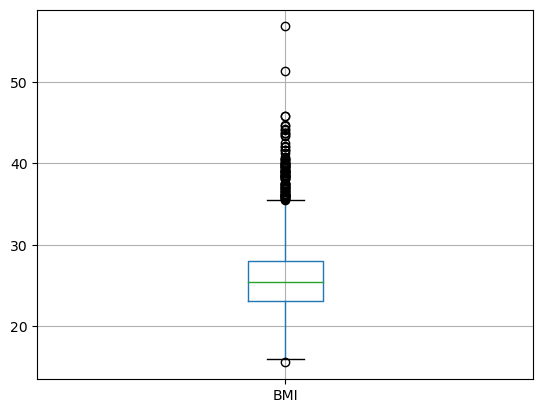

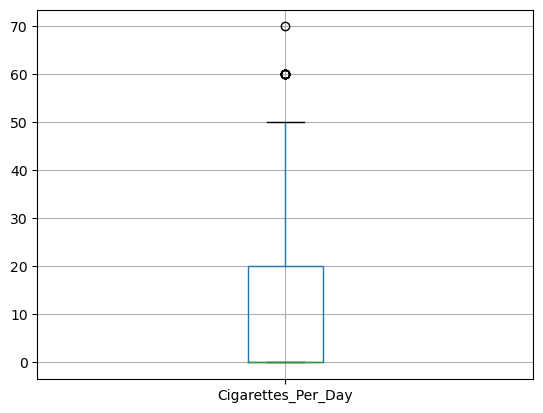

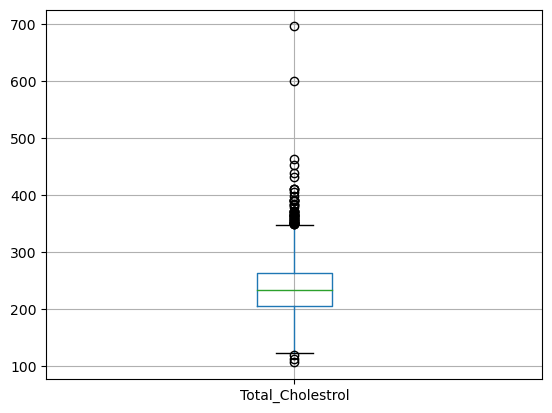

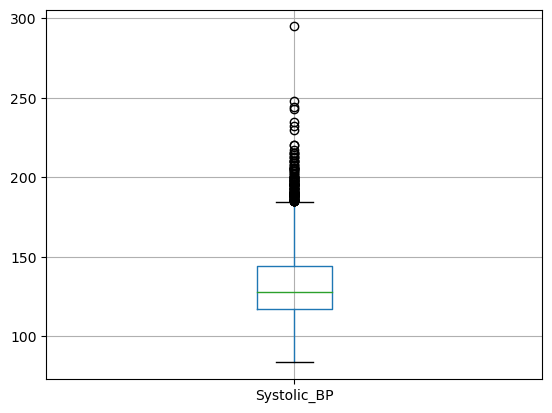

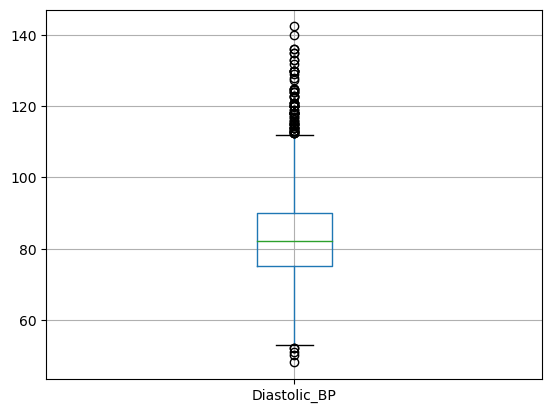

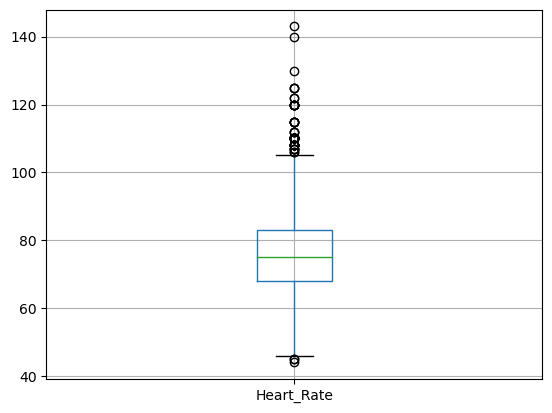

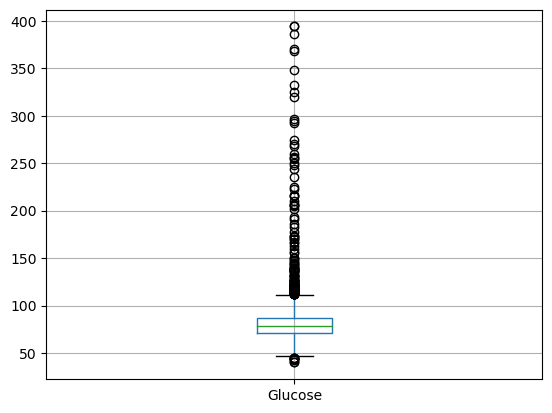

In [315]:
# Create a boxplot
df.boxplot(column = 'BMI')
plt.show()
df.boxplot(column = 'Cigarettes_Per_Day')
plt.show()
df.boxplot(column = 'Total_Cholestrol')
plt.show()
df.boxplot(column = 'Systolic_BP')
plt.show()
df.boxplot(column = 'Diastolic_BP')
plt.show()
df.boxplot(column = 'Heart_Rate')
plt.show()
df.boxplot(column = 'Glucose')

plt.show()

---
# DATA CLEANING STEP 3:HANDLING OUTLIERS

In this section, we will be handling the outliers we detected in the columns Glucose, Systolic_BP and Total_Cholestrol by setting a threshold value and removing the extremes.

In [316]:
# Define a threshold for extreme outliers for required columns and replace it with median or mean values

#for Glucose
threshold = 300
mean_value = df['Glucose'].mean()
df['Glucose'] = np.where(df['Glucose'] > threshold, mean_value, df['Glucose'])

#for Systolic_BP
threshold = 250
mean_value = df['Systolic_BP'].mean()
df['Systolic_BP'] = np.where(df['Systolic_BP'] > threshold, mean_value, df['Systolic_BP'])


#for Total_Cholestrol
threshold = 500
median_value = df['Total_Cholestrol'].median()
df['Total_Cholestrol'] = np.where(df['Total_Cholestrol'] > threshold, median_value, df['Total_Cholestrol'])

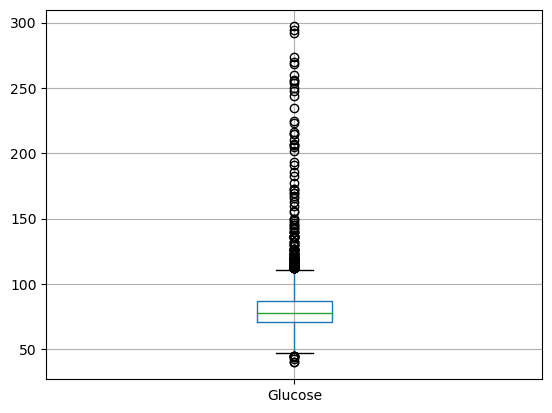

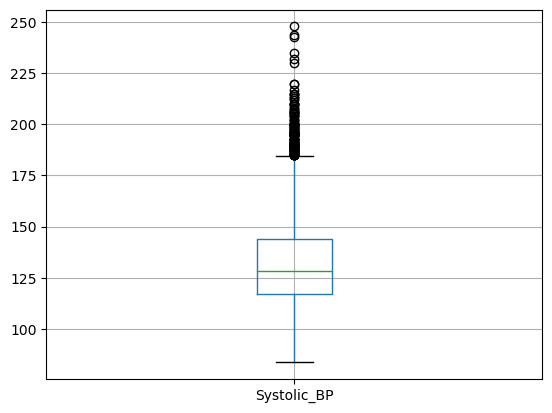

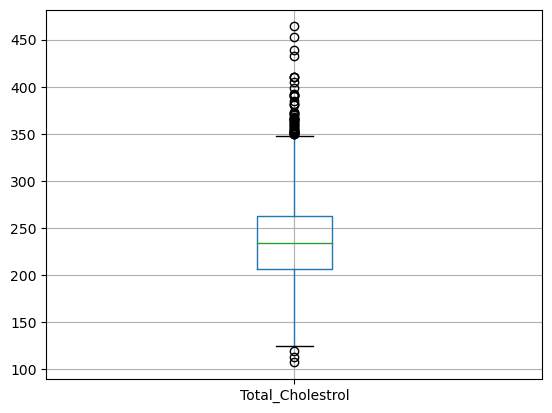

In [317]:
#visualizing the updated Box-plots

df.boxplot(column = 'Glucose')
plt.show()

df.boxplot(column = 'Systolic_BP')
plt.show()

df.boxplot(column = 'Total_Cholestrol')
plt.show()

### Count the number of NA values in the dataframe for each column.

In [318]:
#Checking for null values in the dataframe
df.isna().sum()

Gender                           0
Age                              0
Education_Level                105
Is_Smoker                        0
Cigarettes_Per_Day              29
Systolic_BP                      0
Diastolic_BP                     0
Has_BP_Meds                     53
Has_Prevalent_Hypertension       0
Glucose                        388
Has_Diabetes                     0
BMI                             19
BMI_Category                  4238
Heart_Rate                       1
Total_Cholestrol                50
Has_Prevalent_Stroke             0
Heart_Stroke                     0
dtype: int64

# DATA CLEANING STEP 4: HANDLING MISSING VALUES FOR _NUMERIC_ DATA

After finding the number of missing values we will be dealing with numeric data columns and finding the possible values rather than deleting the values.

In [319]:
#4 After finding the number of missing values we will be dealing with numeric data columns and finding the possible values

#Using the median can be more robust to outliers, which might be influencing the skewness
df['Cigarettes_Per_Day'].fillna(df['Cigarettes_Per_Day'].median(), inplace=True)
df['Total_Cholestrol'].fillna(df['Total_Cholestrol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['Heart_Rate'].fillna(df['Heart_Rate'].median(), inplace=True)

#A skewness value of 6.2 for a column indicates an extremely high positive skew,
#suggesting a heavily skewed distribution with a long tail of higher values
#Since extreme values might be contributing to the high skewness, you can consider trimming the extreme values
#(e.g., top 1% or 5%) and then filling the NA rows with the mean of the trimmed values.

trimmed_values = df['Glucose'].quantile(q=0.99)
df['Glucose'] = df['Glucose'].clip(upper=trimmed_values)
# Fill NA rows with the mean of the trimmed values
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)



# DATA CLEANING STEP 5: HANDLING MISSING VALUES FOR _CATEGORICAL_ DATA

For dealing with NA values the BPMeds and education which is categorical in nature, we will be using mode.


In [320]:
#5 for dealing with the BPMeds and education which is categorical in nature, we will be using mode
df['Has_BP_Meds'].fillna(df['Has_BP_Meds'].mode()[0], inplace=True)
df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)

### Checks for leading and trailing whitespaces in the dataset

In [321]:
#  Checking  whitespaces from dataframe

# Check leading whitespaces
leading_whitespace = df.apply(lambda x: x.astype(str).str.startswith(' ').any())

# Check trailing whitespaces
trailing_whitespace = df.apply(lambda x: x.astype(str).str.endswith(' ').any())

# Print results
print("Columns with leading whitespaces:")
print(leading_whitespace[leading_whitespace].index.tolist())

print("\nColumns with trailing whitespaces:")
print(trailing_whitespace[trailing_whitespace].index.tolist())


Columns with leading whitespaces:
[]

Columns with trailing whitespaces:
[]


# DATA CLEANING STEP 6 : CATEGORIZING CONTINUOUS DATA INTO BINS
In this step, we are categorizing continuous numerical values by placing them into specific bins. This process, commonly referred to as binning, involves grouping numeric data into predefined ranges or bins. Binning is often employed to simplify data analysis, particularly for variables with a broad range of values.

By placing continuous values into categorical bins, we achieve the following objectives:

Mitigate the impact of outliers.
Uncover trends or patterns within distinct ranges.
Simplify the representation of the data.

This step is critical in preparing the data for subsequent analysis or modeling, as it enables us to work with categorical variables that encapsulate important characteristics of the original continuous data.

In [322]:
#2 Define bin edges and labels for BMI categories
bin_edges = [0, 18.5, 24.9, 29.9, 100]  # BMI categories: Underweight, Normal weight, Overweight, Obesity
bin_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

# Create a new column with BMI categories
df['BMI_Category'] = pd.cut(df['BMI'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the 'BMI' and 'BMI_Category' columns
print(df[['BMI', 'BMI_Category']])

        BMI   BMI_Category
0     26.97     Overweight
1     28.73     Overweight
2     25.34     Overweight
3     28.58     Overweight
4     23.10  Normal weight
...     ...            ...
4233  25.97     Overweight
4234  19.71  Normal weight
4235  22.00  Normal weight
4236  19.16  Normal weight
4237  21.47  Normal weight

[4238 rows x 2 columns]


In [323]:
df.isna().sum()

Gender                        0
Age                           0
Education_Level               0
Is_Smoker                     0
Cigarettes_Per_Day            0
Systolic_BP                   0
Diastolic_BP                  0
Has_BP_Meds                   0
Has_Prevalent_Hypertension    0
Glucose                       0
Has_Diabetes                  0
BMI                           0
BMI_Category                  0
Heart_Rate                    0
Total_Cholestrol              0
Has_Prevalent_Stroke          0
Heart_Stroke                  0
dtype: int64

# DATA CLEANING STEP 7: IDENTIFYING DISTINCT VALUES FOR FEATURE ENCODING

In this step, our goal is to explore and identify the distinct values present in the dataset. This exploration is crucial for determining the appropriate encoding strategy for categorical features. Encoding involves transforming categorical data into a numerical format that machine learning algorithms can understand.

### Choosing an Encoder:
Based on the nature of the categorical features and the number of distinct values, select an appropriate encoding technique.
Common encoding methods include Label Encoding, One-Hot Encoding, and Ordinal Encoding. We will be using Label Encoding.

### Why Distinct Values Matter:
Distinct values impact the choice of encoder. When dealing with a small number of distinct values, one-hot encoding is often suitable. For a large number of unique values, other strategies like label encoding or ordinal encoding may be more appropriate.



In [324]:
#6 finding the distinct values in the dataset , so according to which we can choose the encoder and perform encoding on the features
distinct_values_Gender = df['Gender'].unique()
print("Distinct values in Gender", distinct_values_Gender)

distinct_values_Education_Level = df['Education_Level'].unique()
print("Distinct values in Education_Level", distinct_values_Education_Level)

distinct_values_Heart_Stroke = df['Heart_Stroke'].unique()
print("Distinct values in Heart_Stroke", distinct_values_Heart_Stroke)

distinct_values_Has_Prevalent_Stroke = df['Has_Prevalent_Stroke'].unique()
print("Distinct values in Has_Prevalent_Stroke", distinct_values_Has_Prevalent_Stroke)


columns_to_encode = ['Gender', 'Education_Level' , 'Heart_Stroke' , 'Has_Prevalent_Stroke' , 'BMI_Category' ]


# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate through each column and encode
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

Distinct values in Gender ['Male' 'Female']
Distinct values in Education_Level ['postgraduate' 'primaryschool' 'uneducated' 'graduate']
Distinct values in Heart_Stroke ['No' 'yes']
Distinct values in Has_Prevalent_Stroke ['no' 'yes']


# DATA CLEANING STEP 8: ADJUSTING DATA TYPES OF COLUMNS

In this step, we focus on refining the data types of columns within the dataset. Proper data type selection is crucial for efficient memory usage, accurate analysis, and compatibility with machine learning algorithms. Here's a breakdown of the process:

### Understanding Current Data Types:
Begin by inspecting the current data types of each column in the DataFrame using the dtypes attribute.
### Identifying Mismatches:
Look for columns where the current data type may not align with the nature of the data. For example, column _Cigarettes_Per_Day_ cannot have float values since a person can smoke 0 or more cigrarettes not in decimal. It also does not make right sense to have a boolean column like _Has_BP_Meds_ float datatype.

### Handling Numerical Columns:
We ensure that columns have an appropriate data type (e.g., integers for whole numbers, floats for decimals).

In [325]:
df.dtypes

Gender                          int64
Age                             int64
Education_Level                 int64
Is_Smoker                       int64
Cigarettes_Per_Day            float64
Systolic_BP                   float64
Diastolic_BP                  float64
Has_BP_Meds                   float64
Has_Prevalent_Hypertension      int64
Glucose                       float64
Has_Diabetes                    int64
BMI                           float64
BMI_Category                    int64
Heart_Rate                    float64
Total_Cholestrol              float64
Has_Prevalent_Stroke            int64
Heart_Stroke                    int64
dtype: object

In [326]:
#7 Changing Data Type of Columns
df['Cigarettes_Per_Day'] = df['Cigarettes_Per_Day'].astype(int)
df['Has_BP_Meds'] = df['Has_BP_Meds'].astype(int)
df['Total_Cholestrol'] = df['Total_Cholestrol'].astype(int)
df['Heart_Rate'] = df['Heart_Rate'].astype(int)
df['Glucose'] = df['Glucose'].astype(int)
df['Gender'] = df['Gender'].astype(int)
df['Education_Level'] = df['Education_Level'].astype(int)
df['Heart_Stroke'] = df['Heart_Stroke'].astype(int)
df['Has_Prevalent_Stroke'] = df['Heart_Stroke'].astype(int)

df.dtypes

Gender                          int64
Age                             int64
Education_Level                 int64
Is_Smoker                       int64
Cigarettes_Per_Day              int64
Systolic_BP                   float64
Diastolic_BP                  float64
Has_BP_Meds                     int64
Has_Prevalent_Hypertension      int64
Glucose                         int64
Has_Diabetes                    int64
BMI                           float64
BMI_Category                    int64
Heart_Rate                      int64
Total_Cholestrol                int64
Has_Prevalent_Stroke            int64
Heart_Stroke                    int64
dtype: object

# DATA CLEANING Step 9: Modifying Precision of Float Values

In this step, our focus is on refining the precision of floating-point values within the dataset. Precision adjustment is essential for controlling the level of detail in numerical representations.

We would like to keep columns 'Systolic_BP', 'Diastolic_BP', 'BMI' as floating type with precision of 2. It is a crucial step as we dont want inconsistenties in the float values like (1.5 and 7.89) it should be (1.50 and 7.89) 

In [327]:
#8 Changing the precision of the float columns
columns_to_round = ['Systolic_BP', 'Diastolic_BP', 'BMI']
df[columns_to_round] = df[columns_to_round].round(2)

---
---
# Exploratory Data Analysis (EDA)


## EDA 2 - CHECKING SKEWNESS OF FEATURES

In [328]:
#checking skewness of data
# postive : Also known as right skew or right-tail skew
# Negtive : Also known as left skew or left-tail skew.
# Zero : Indicates a symmetric distribution

skewness = df.skew()
print(skewness)

Gender                        0.286135
Age                           0.228146
Education_Level              -0.738641
Is_Smoker                     0.023606
Cigarettes_Per_Day            1.257472
Systolic_BP                   1.076292
Diastolic_BP                  0.714102
Has_BP_Meds                   5.588351
Has_Prevalent_Hypertension    0.819278
Glucose                       1.975582
Has_Diabetes                  5.994378
BMI                           0.985442
BMI_Category                  0.053554
Heart_Rate                    0.644608
Total_Cholestrol              0.531201
Has_Prevalent_Stroke          1.939741
Heart_Stroke                  1.939741
dtype: float64


## EDA 3 : DataFrame Shape

The shape of the DataFrame is given by the number of rows and columns. We can retrieve this information using the `shape` attribute of the DataFrame.


In [329]:
df.shape

(4238, 17)

## EDA 4 : DataFrame Summary Statistics

In this section, we present the summary statistics for the DataFrame. These statistics offer valuable insights into the central tendency, dispersion, and distribution of numerical columns. 

In [330]:
df.describe()

,Gender,Age,Education_Level,Is_Smoker,Cigarettes_Per_Day,Systolic_BP,Diastolic_BP,Has_BP_Meds,Has_Prevalent_Hypertension,Glucose,Has_Diabetes,BMI,BMI_Category,Heart_Rate,Total_Cholestrol,Has_Prevalent_Stroke,Heart_Stroke
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.994809,0.494101,8.941482,132.314028,82.893464,0.029259,0.310524,80.650071,0.025720,25.800205,1.019821,75.878716,236.494101,0.151958,0.151958
std,0.495022,8.572160,1.091288,0.500024,11.902399,21.895950,11.910850,0.168552,0.462763,14.987211,0.158316,4.071041,0.953774,12.025185,43.404398,0.359023,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,40.000000,0.000000,15.540000,0.000000,44.000000,107.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,117.000000,75.000000,0.000000,0.000000,72.000000,0.000000,23.080000,0.000000,68.000000,206.000000,0.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,128.000000,82.000000,0.000000,0.000000,80.000000,0.000000,25.400000,1.000000,75.000000,234.000000,0.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,144.000000,89.875000,0.000000,1.000000,85.000000,0.000000,28.037500,2.000000,83.000000,262.000000,0.000000,0.000000
max,1.000000,70.000000,3.000000,1.000000,70.000000,248.000000,142.500000,1.000000,1.000000,158.000000,1.000000,56.800000,3.000000,143.000000,464.000000,1.000000,1.000000


# EDA 5 : Generating Histograms for Each Feature

In this step, we aim to create histograms for each feature in the dataset. Histograms offer a visual representation of the distribution of numerical data, allowing us to observe patterns, identify outliers, and understand the spread of values across different featuresdf.hist(figsize = (14,14))

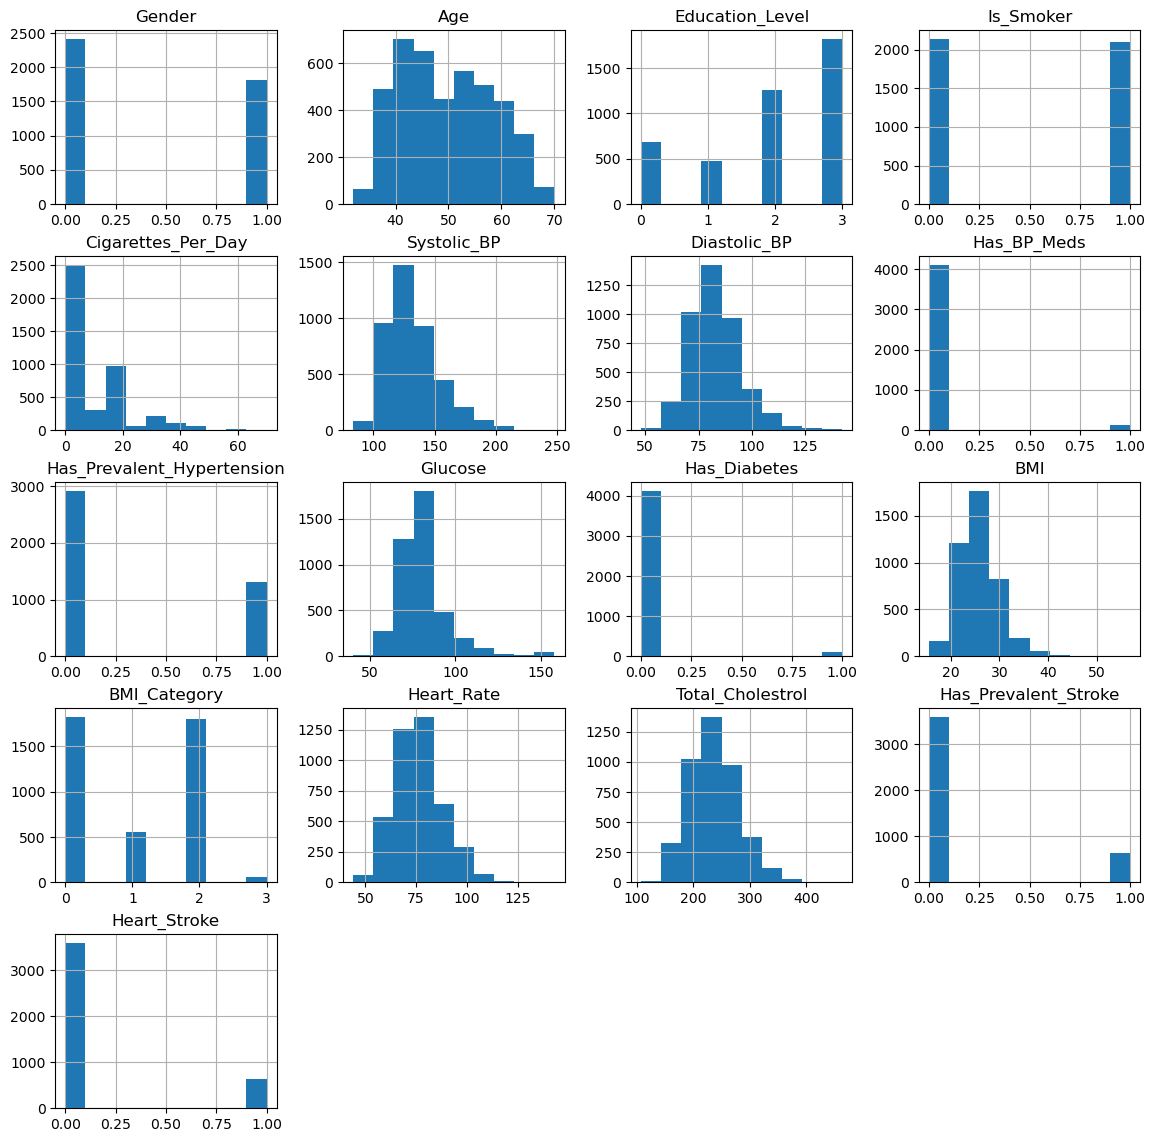

In [331]:
df.hist(figsize = (14,14))
plt.show()

# EDA 6: Exploring Feature Correlation with Heatmap

In this step, we delve into understanding the correlation between different features in the dataset. A heatmap is an effective visualization tool to showcase the correlation matrix, offering insights into relationships between variables.

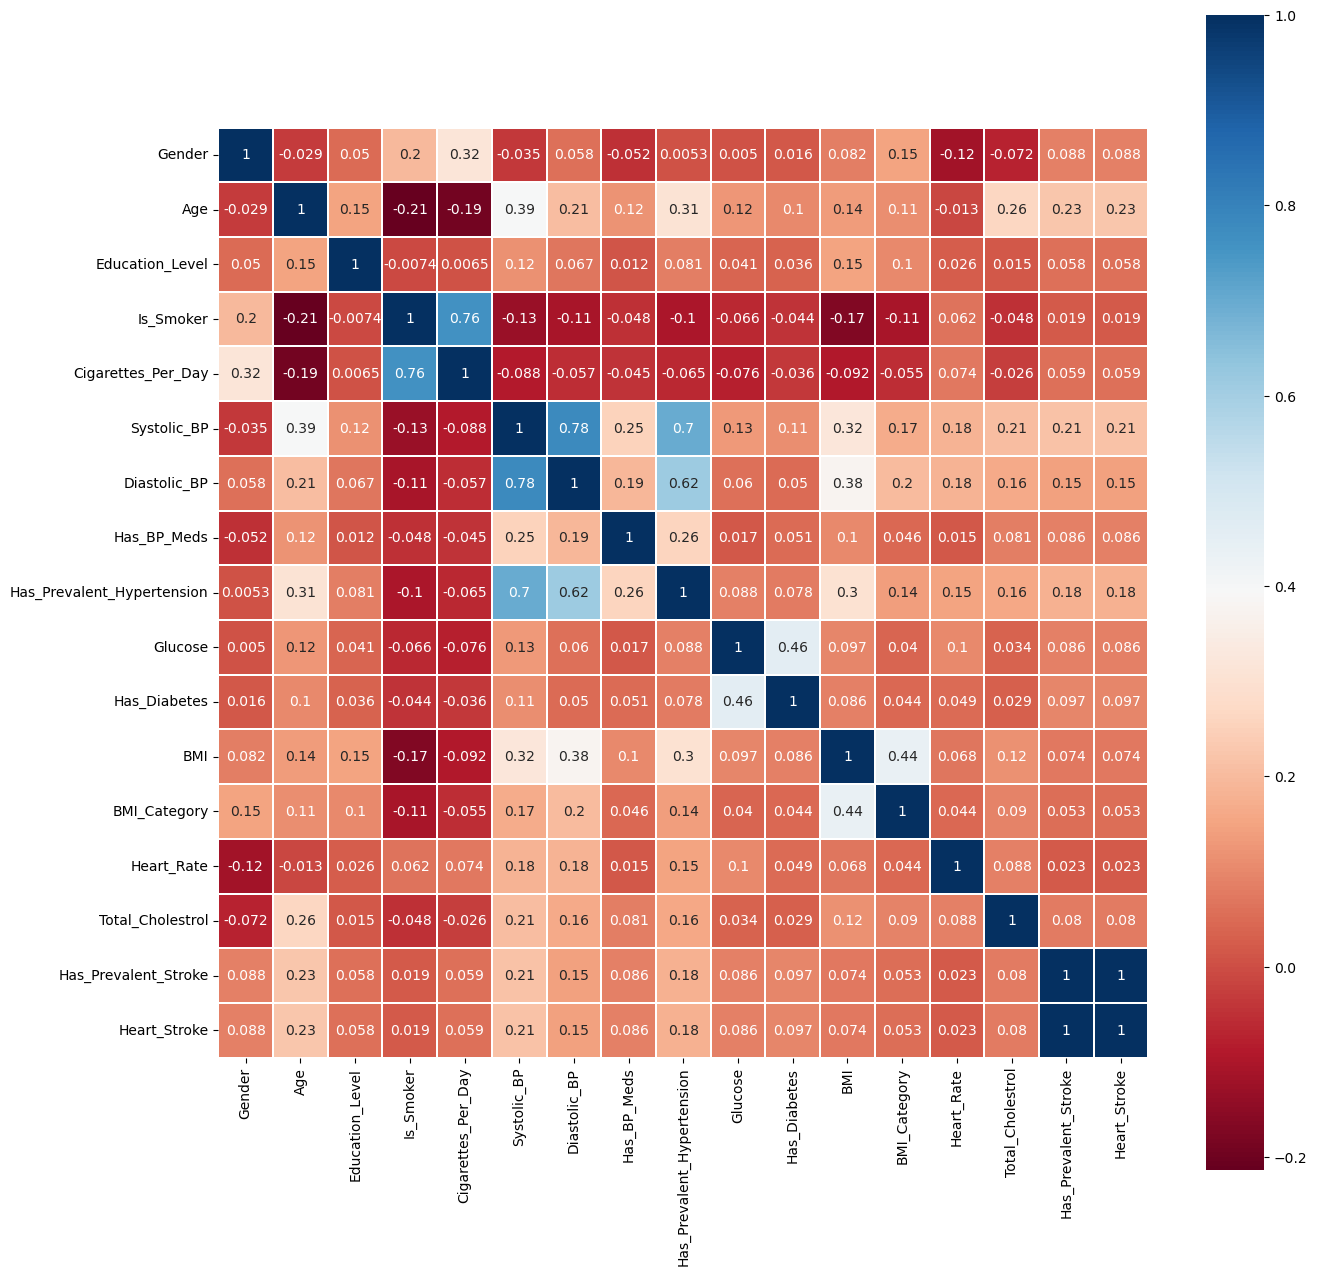

In [332]:
#4 Checking the correlation between the features using heatmap 
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),square=True, cmap = 'RdBu', linecolor='white', annot=True , linewidths=0.1,vmax=1.0)
plt.show()

# EDA 7: Calculating Standard Deviation, Mode and Median

In this step, we compute the mode and median for each feature in the dataset. Mode represents the most frequently occurring value, while the median represents the middle value in a sorted dataset.

In [333]:
# 5 calculating Mode and Median of the data
print('Standard Deviation of all features')
print(df.std())
print('\n')
print('Median of all features')
print(df.median())
print('\n')
df.mode()

Standard Deviation of all features
Gender                         0.495022
Age                            8.572160
Education_Level                1.091288
Is_Smoker                      0.500024
Cigarettes_Per_Day            11.902399
Systolic_BP                   21.895950
Diastolic_BP                  11.910850
Has_BP_Meds                    0.168552
Has_Prevalent_Hypertension     0.462763
Glucose                       14.987211
Has_Diabetes                   0.158316
BMI                            4.071041
BMI_Category                   0.953774
Heart_Rate                    12.025185
Total_Cholestrol              43.404398
Has_Prevalent_Stroke           0.359023
Heart_Stroke                   0.359023
dtype: float64


Median of all features
Gender                          0.0
Age                            49.0
Education_Level                 2.0
Is_Smoker                       0.0
Cigarettes_Per_Day              0.0
Systolic_BP                   128.0
Diastolic_BP                 

,Gender,Age,Education_Level,Is_Smoker,Cigarettes_Per_Day,Systolic_BP,Diastolic_BP,Has_BP_Meds,Has_Prevalent_Hypertension,Glucose,Has_Diabetes,BMI,BMI_Category,Heart_Rate,Total_Cholestrol,Has_Prevalent_Stroke,Heart_Stroke
0,0,40,3,0,0,120.0,80.0,0,0,80,0,25.4,0,75,234,0,0


## FEATURE ENGINEERING 

we explore the relationship between two columns in the dataset, focusing on the scenario where one column significantly impacts the other. This analysis is essential for understanding how changes in one variable correspond to variations in another.

In the below code snippet, Column Is_Smoker and Cigarettes_Per_Day illustrates strong correlation. Similarly, 

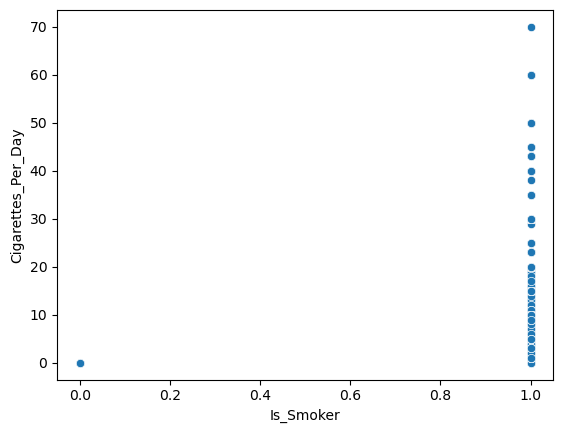

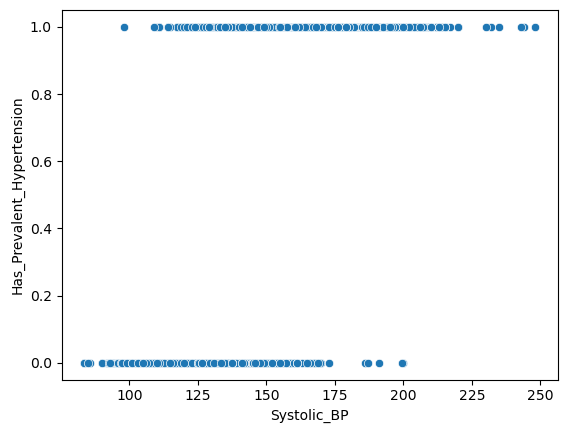

In [334]:
sns.scatterplot(x='Is_Smoker', y='Cigarettes_Per_Day', data=df)
plt.show()

sns.scatterplot(x='Systolic_BP', y='Has_Prevalent_Hypertension', data=df)
plt.show()

# EDA 8 Weak Correlation Column Analysis [Education_Level]

In analyzing the correlation of the 'Education_Level' column with other features, we observe the following:



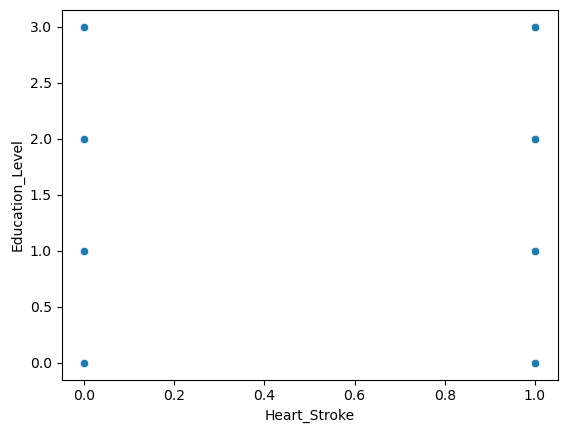

Correlation with 'Education_Level' for each column:
Gender                        0.050436
Age                           0.151097
Education_Level               1.000000
Is_Smoker                    -0.007409
Cigarettes_Per_Day            0.006482
Systolic_BP                   0.117305
Diastolic_BP                  0.067395
Has_BP_Meds                   0.012374
Has_Prevalent_Hypertension    0.081240
Glucose                       0.040669
Has_Diabetes                  0.036291
BMI                           0.146720
BMI_Category                  0.100778
Heart_Rate                    0.026066
Total_Cholestrol              0.015311
Has_Prevalent_Stroke          0.058036
Heart_Stroke                  0.058036
Name: Education_Level, dtype: float64


In [335]:
#5 

sns.scatterplot(x='Heart_Stroke', y='Education_Level', data=df)
plt.show()

# Calculate the Education_Level correlation with all other columns
education_level_correlations = df.corr()['Education_Level']

# Display the  Education_Level correlations
print("Correlation with 'Education_Level'", "for each column:")
print(education_level_correlations)


### Weak Correlations: Features with correlation coefficients close to zero suggest a limited association with 'Education_Level.'
Gender: 0.0504
Is_Smoker: -0.0074
Cigarettes_Per_Day: 0.0065
Has_BP_Meds: 0.0124
Has_Prevalent_Hypertension: 0.0812
Glucose: 0.0359
Has_Diabetes: 0.0363
Heart_Rate: 0.0261
Total_Cholestrol: 0.0173
Has_Prevalent_Stroke: 0.0580
Heart_Stroke:0.0580

Since, the feature does not provide any significant input on the target or any other features. It can be removed from the dataframe.

# __[LATE DATA CLEANING] STEP 10__: DROP COLUMN EDUCATION_LEVEL AFTER FEATURE ANALYSIS

In [336]:
df = df.drop(columns= ['Education_Level']) 

df

,Gender,Age,Is_Smoker,Cigarettes_Per_Day,Systolic_BP,Diastolic_BP,Has_BP_Meds,Has_Prevalent_Hypertension,Glucose,Has_Diabetes,BMI,BMI_Category,Heart_Rate,Total_Cholestrol,Has_Prevalent_Stroke,Heart_Stroke
0,1,39,0,0,106.0,70.0,0,0,77,0,26.97,2,80,195,0,0
1,0,46,0,0,121.0,81.0,0,0,76,0,28.73,2,95,250,0,0
2,1,48,1,20,127.5,80.0,0,0,70,0,25.34,2,75,245,0,0
3,0,61,1,30,150.0,95.0,0,1,103,0,28.58,2,65,225,1,1
4,0,46,1,23,130.0,84.0,0,0,85,0,23.10,0,85,285,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1,179.0,92.0,0,1,86,0,25.97,2,66,313,1,1
4234,1,51,1,43,126.5,80.0,0,0,68,0,19.71,0,65,207,0,0
4235,0,48,1,20,131.0,72.0,0,0,86,0,22.00,0,84,248,0,0
4236,0,44,1,15,126.5,87.0,0,0,80,0,19.16,0,86,210,0,0


# EDA 8 : PIE CHART

### PIE CHART FOR BMI Categories

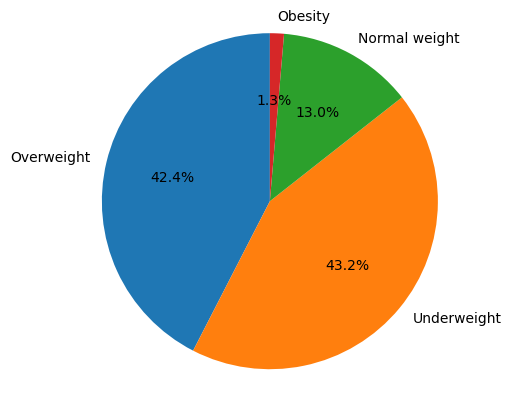

In [337]:
data = df['BMI_Category']

# Count the occurrences of each unique string
data_counts = Counter(data)
# Map original labels to custom labels
custom_labels = {0: 'Underweight', 1: 'Normal weight',2:'Overweight',3:'Obesity'}

# Get labels and sizes for the pie chart
sizes = list(data_counts.values())
labels = list(data_counts.keys())

# Replace original labels with custom labels
labels = [custom_labels.get(label, label) for label in labels]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

### Gender PIE CHART

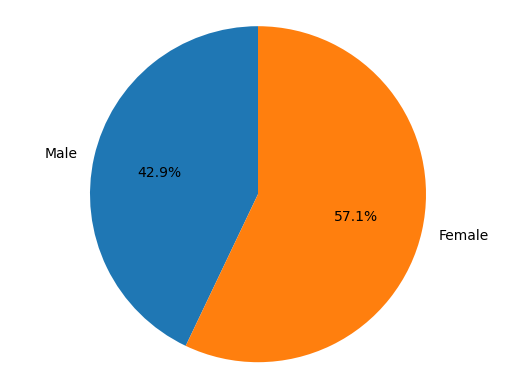

In [338]:
data = df['Gender']
custom_labels = {0: 'Female', 1: 'Male'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

# Replace original labels with custom labels
labels = [custom_labels.get(label, label) for label in labels]
# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

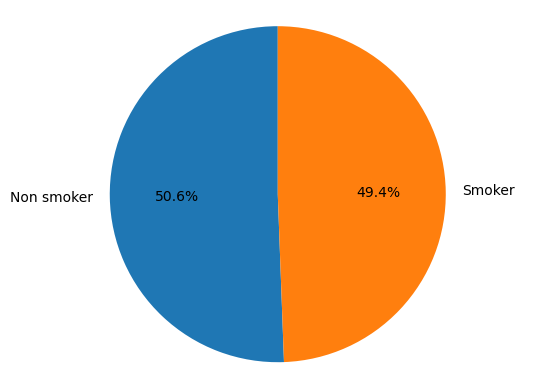

In [339]:
data = df['Is_Smoker']

custom_labels = {0: 'Non smoker', 1: 'Smoker'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

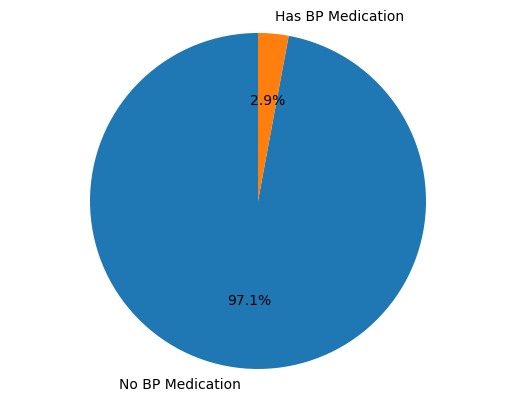

In [340]:
data = df['Has_BP_Meds']
custom_labels = {0: 'No BP Medication', 1: 'Has BP Medication'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

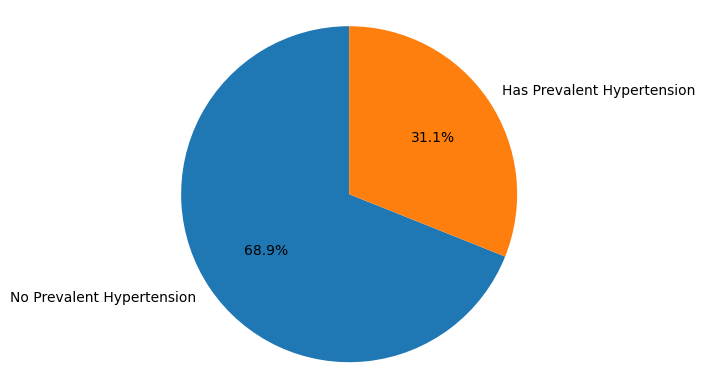

In [341]:
data = df['Has_Prevalent_Hypertension']
custom_labels = {0: 'No Prevalent Hypertension', 1: 'Has Prevalent Hypertension'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

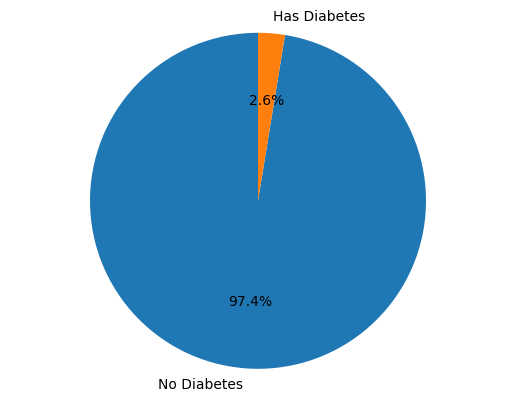

In [342]:
data = df['Has_Diabetes']
custom_labels = {0: 'No Diabetes', 1: 'Has Diabetes'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

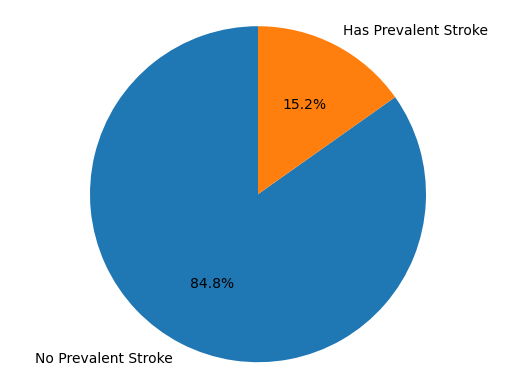

In [343]:
data = df['Has_Prevalent_Stroke']
custom_labels = {0: 'No Prevalent Stroke', 1: 'Has Prevalent Stroke'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

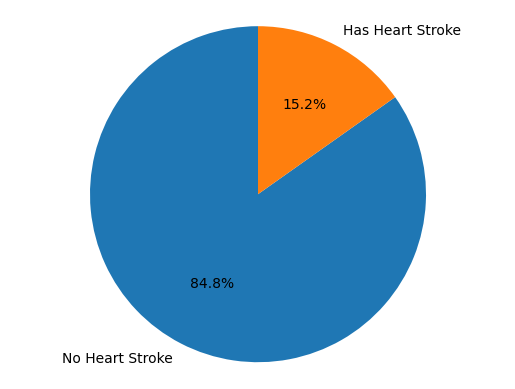

In [344]:
data = df['Heart_Stroke']
custom_labels = {0: 'No Heart Stroke', 1: 'Has Heart Stroke'}


# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

# EDA 9:  Violin Plot

## Violin Plot for BMI Categories

In this section, we will plot violin plots for our numeric and catgegorial values.  In violin plota the width of the violin depicts how dense the data points are in that density. We can also see a line inside the violin, this line represnts the median of the numeric values

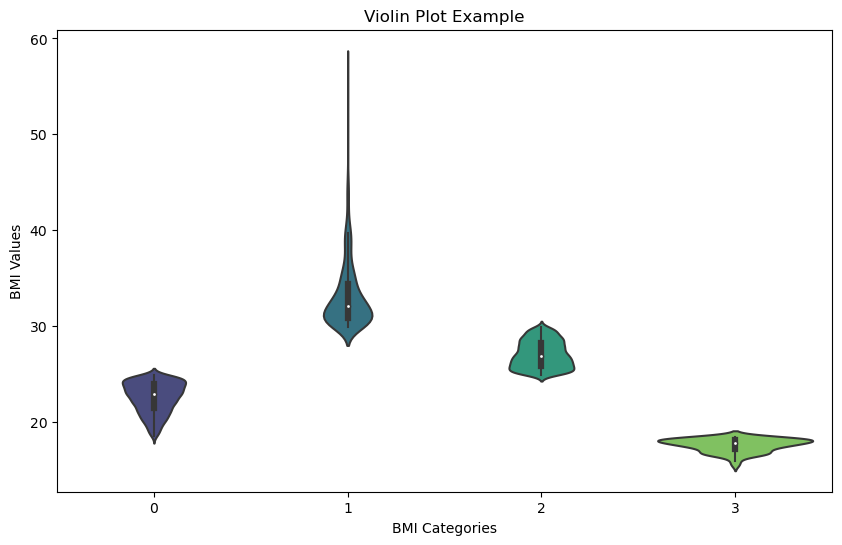

In [345]:

plt.figure(figsize=(10, 6))
sns.violinplot(x=df['BMI_Category'], y=df['BMI'], data=df, palette='viridis')
plt.title('Violin Plot Example')
plt.xlabel('BMI Categories')
plt.ylabel('BMI Values')
plt.show()

## Violin Plot for Heart_Stroke

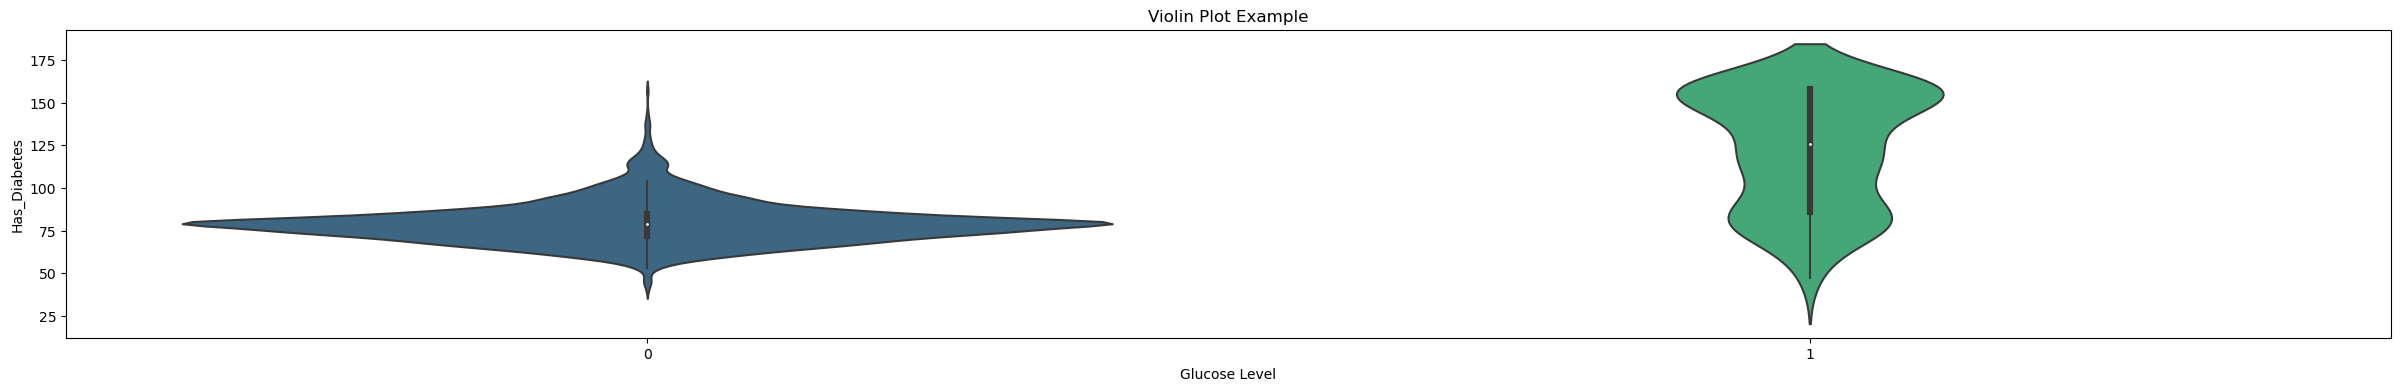

In [346]:

plt.figure(figsize=(30, 4))
sns.violinplot(x=df['Has_Diabetes'], y=df['Glucose'], data=df, palette='viridis')
plt.title('Violin Plot Example')
plt.xlabel('Glucose Level')
plt.ylabel('Has_Diabetes')
plt.show()

# EDA 10: PAIR PLOT

/Users/minaz/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/p0/t2wf0h4d60j65zz9jxvn21400000gn/T/ipykernel_52461/3387467578.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


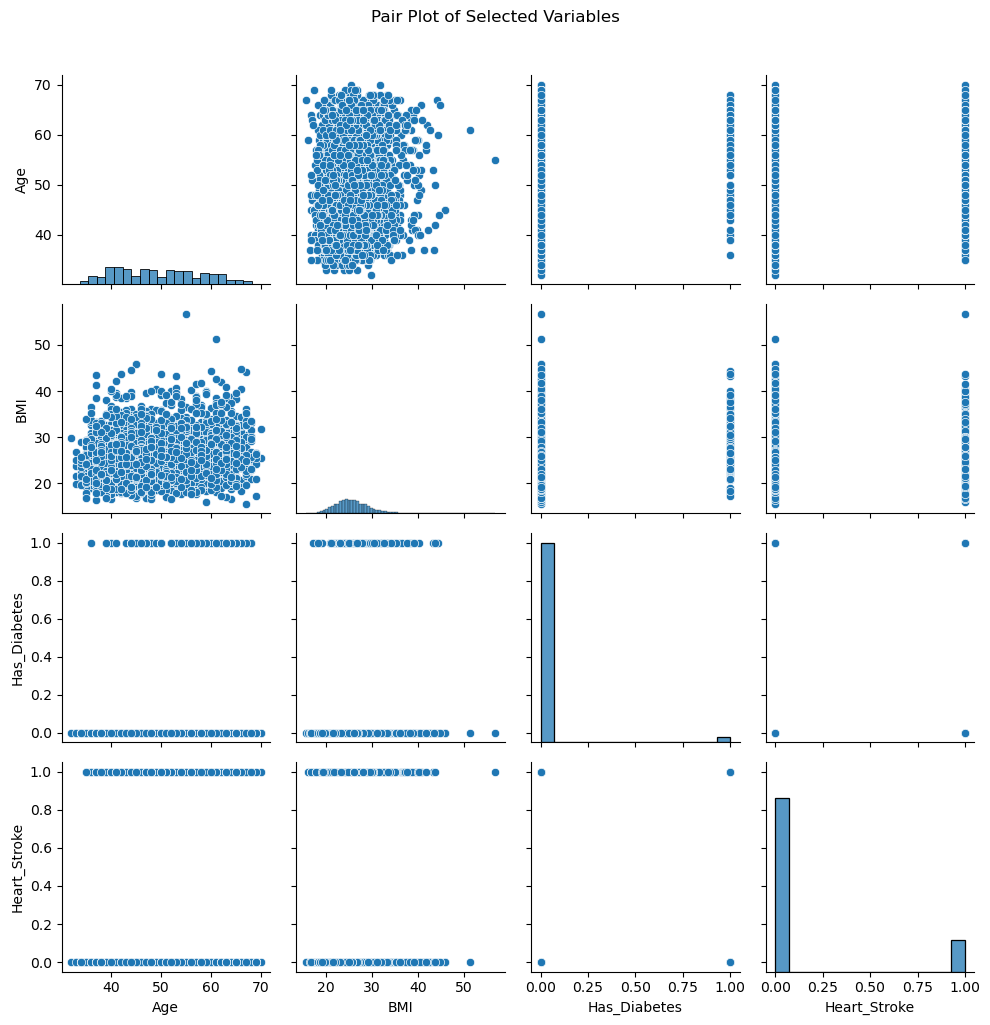

In [347]:
selected_columns = ['Age', 'BMI', 'Has_Diabetes', 'Heart_Stroke']

# Create a pair plot
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.tight_layout() 
plt.show()

# EDA 11 - CATEGORICAL BOX PLOT

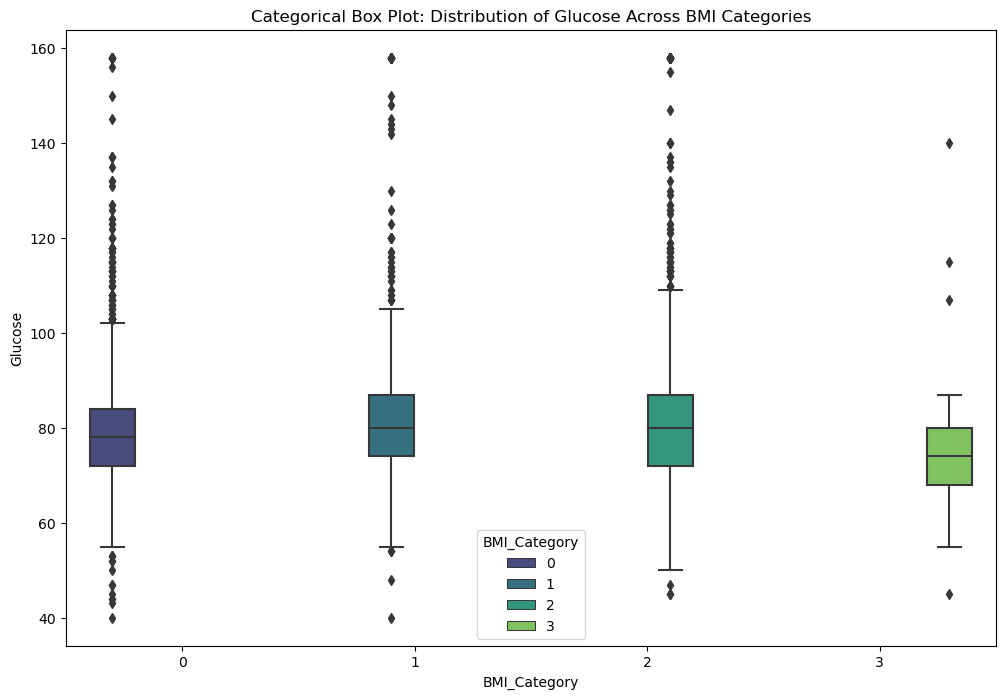

In [348]:
# Categorical Box Plot with respect to 'Has_Diabetes'
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['BMI_Category'], y=df['Glucose'], hue=df['BMI_Category'], palette='viridis')
plt.title('Categorical Box Plot: Distribution of Glucose Across BMI Categories')
plt.show()

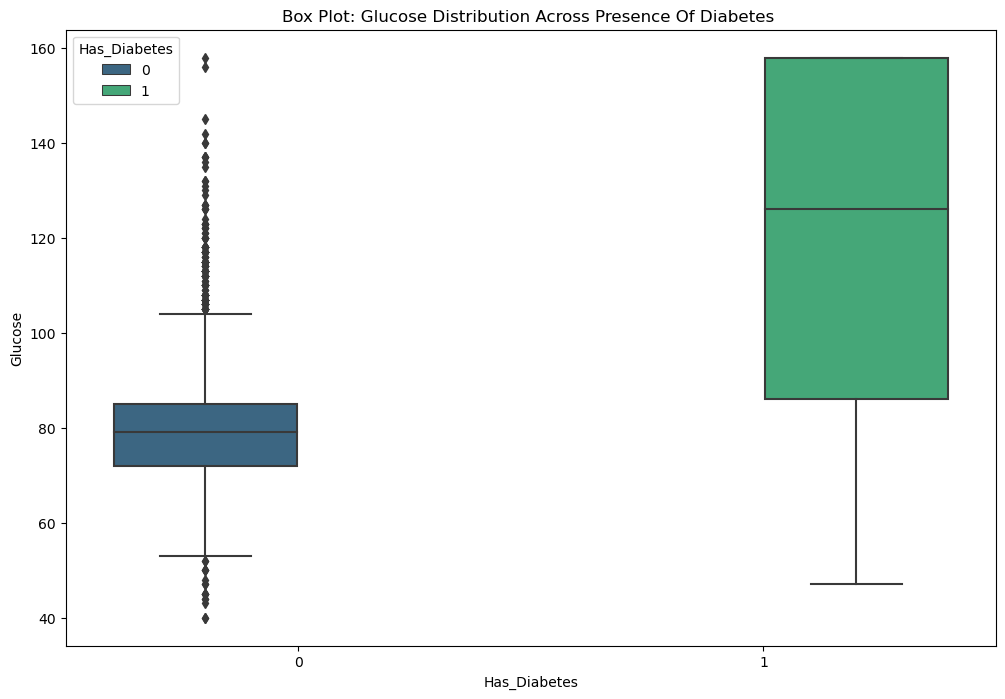

In [349]:
# Categorical Box Plot: Distribution of Glucose Across Presenece Of Diabetes 
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Has_Diabetes'], y=df['Glucose'], hue=df['Has_Diabetes'], palette='viridis')
plt.title('Box Plot: Glucose Distribution Across Presence Of Diabetes ')
plt.show()


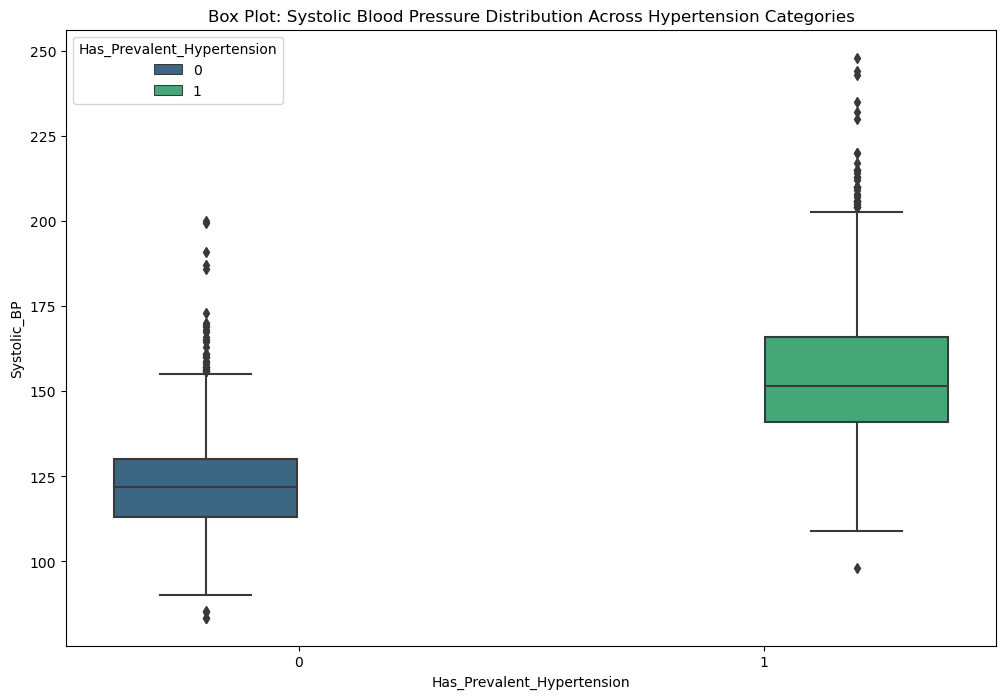

In [350]:
# Categorical Box Plot: Distribution of Systolic Blood Pressure Across Hypertension Categories
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Has_Prevalent_Hypertension'], y=df['Systolic_BP'], hue=df['Has_Prevalent_Hypertension'], palette='viridis')
plt.title('Box Plot: Systolic Blood Pressure Distribution Across Hypertension Categories')
plt.show()


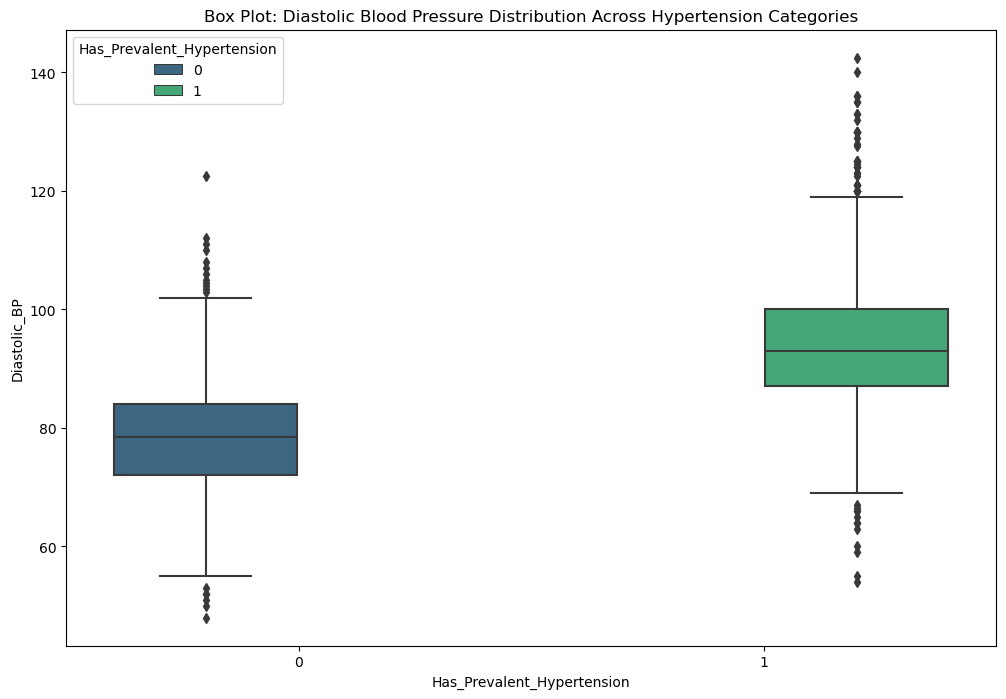

In [351]:
# Categorical Box Plot: Distribution of Diastolic Blood Pressure Across Hypertension Categories
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Has_Prevalent_Hypertension'], y=df['Diastolic_BP'], hue=df['Has_Prevalent_Hypertension'], palette='viridis')
plt.title('Box Plot: Diastolic Blood Pressure Distribution Across Hypertension Categories')
plt.show()
